<a href="https://colab.research.google.com/github/ColocadoJoyce/CCMARCL_EXERCISES_COM221ML/blob/main/Exercise3_Colocado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the packages

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay



## Load and Understand the Dataset

In [6]:
df = pd.read_excel('personality.xlsx')

In [7]:
df.head()

,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,Diana Nicole Danga,0,1,1,1100,0
1,Jascent Navarro,1,1,0,762,1
2,Jeff Gannaban,0,0,0,1600,0
3,Fortune Bermudez,1,1,1,443,1
4,Ara Gonzaga,1,1,1,350,1


Display the summary of all the features of the dataset using .info()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         50 non-null     object
 1   Post/Share Frequently?       50 non-null     int64 
 2   Active in social media?      50 non-null     int64 
 3   Replies to comments?         50 non-null     int64 
 4   Number of friends/followers  50 non-null     int64 
 5   Personality                  50 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


Display the total number of samples from each label using .value_counts()

In [9]:
df.value_counts()

,,,,,,count
Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality,
Aldrin Galvez,1,1,1,1453,1,1
Mureigne Daet,1,1,1,1234,1,1
Jerica Marfil,1,1,1,4421,1,1
Jessica Marfil,1,1,1,941,1,1
Jillian Hernandez,1,1,1,3031,1,1
John Vernon Baldeo,0,0,0,351,0,1
Joy Panganiban,0,0,0,785,0,1
Kalli Fuentes,1,1,1,491,1,1
Kristel Malibay,0,1,0,781,0,1


In [11]:
df.drop(columns='Name', inplace = True)

In [14]:
df['Personality'].value_counts()

,count
Personality,
1,28
0,22


In [15]:
df.head()

,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,0,1,1,1100,0
1,1,1,0,762,1
2,0,0,0,1600,0
3,1,1,1,443,1
4,1,1,1,350,1


## Split the dataset into training and test set

Convert the features into an numpy array using .values() and store it in a variable "X"

In [17]:
#Array of features
X = df.drop(columns=['Personality']).values



Convert the labels into an numpy array using .values() and store it in a variable "y"

In [21]:
#Array of labels
y = df['Personality'].values

Use train_test_split() to split the data.


-Declare a variable X_train that will hold the training data

-Declare a variable X_test that will hold the test data

-Declare a variable y_train that will hold the label of the training data

-Declare a variable y_test that will hold the label of the test data



In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=5)
print (X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40, 4)
(40,)
(10, 4)
(10,)


##Create the model

Use KNN as a classifier by using KNeighborsClassifier()

In [56]:
knn = KNeighborsClassifier(n_neighbors=9)

Train the model using the .fit()

In [57]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [58]:
# Test the model
y_pred = knn.predict(X_test)

##Evaluate the Model

Create a confusion matrix

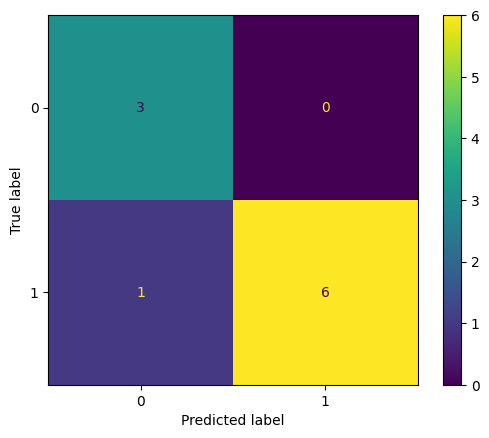

In [59]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [60]:
metrics.accuracy_score(y_test, y_pred)

0.9

Display the precision

In [61]:

precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [1.         0.85714286]


Display the recall

In [62]:
# Calculate recall
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.75 1.  ]


Display the f1-score

In [63]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.85714286 0.92307692]


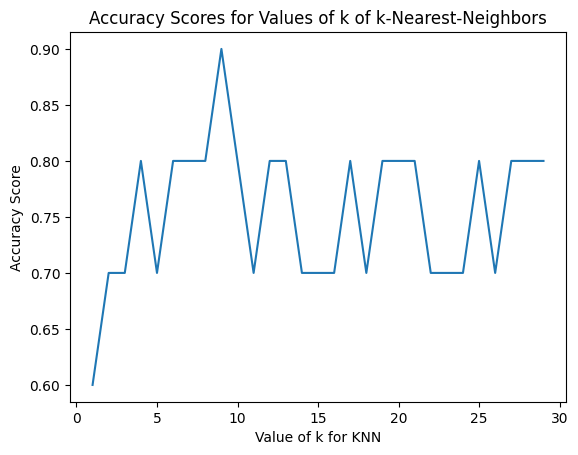

In [64]:
# experimenting with different n values
k_range = list(range(1,30))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [70]:
knn.predict([[0, 1, 0, 1000 ]])

array([0])